# Visualizing Time Series Data

시계열 데이터를 시각화 하는데 중요한 핵심 사항을 살펴보겠습니다.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('./Data/starbucks.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [4]:
# To show that dates are already parsed
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

First we'll create a line plot that puts both <tt>'Close'</tt> and <tt>'Volume'</tt> on the same graph.<br>Remember that we can use <tt>df.plot()</tt> in place of <tt>df.plot.line()</tt>

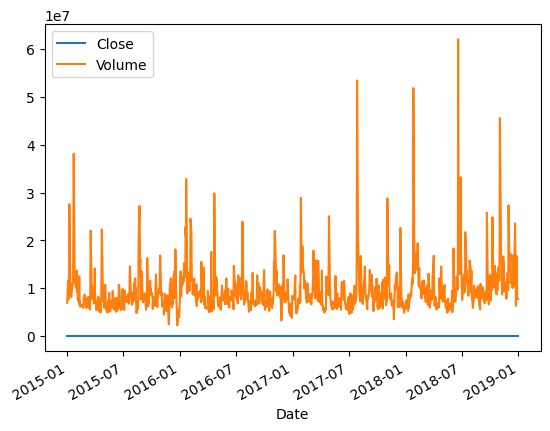

In [6]:
df.plot();

Close와 Volume의 scale이 매우 크게 차이나기 때문에, 이 시각화는 좋지 않습니다.<br>
변수별로 따로 그림을 그려주어야 합니다.

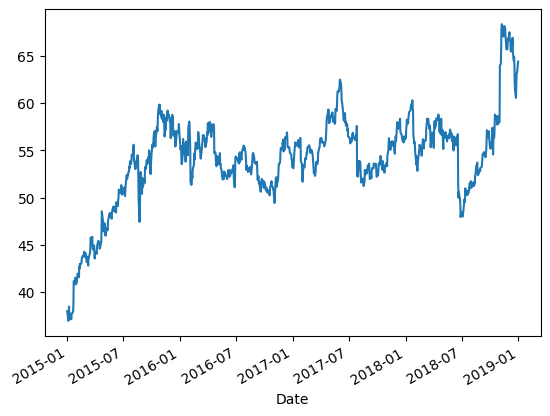

In [7]:
df['Close'].plot();

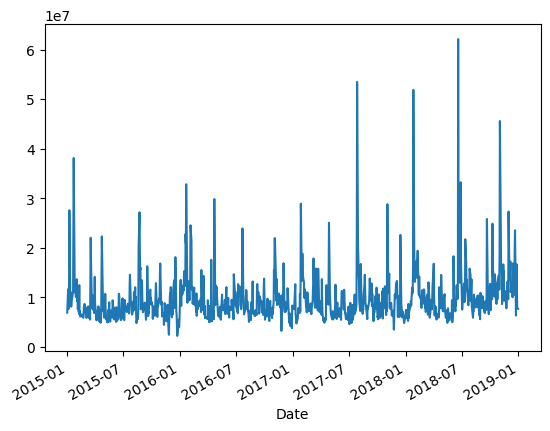

In [8]:
df['Volume'].plot();

# Plot Formatting

## Figure에 title, axis label 추가하기

<div class="alert alert-info"><strong>NOTE:</strong> Pandas plot 함수에 title 인자를 넘겨줄 수 있지만, axis 정보를 줄 순 없습니다.<br> 따라서, matplotlib.axes.AxesSubplot object를 return 하는 plot 함수의 특성 상, axis label을 넘겨줄 수 있습니다.</div>

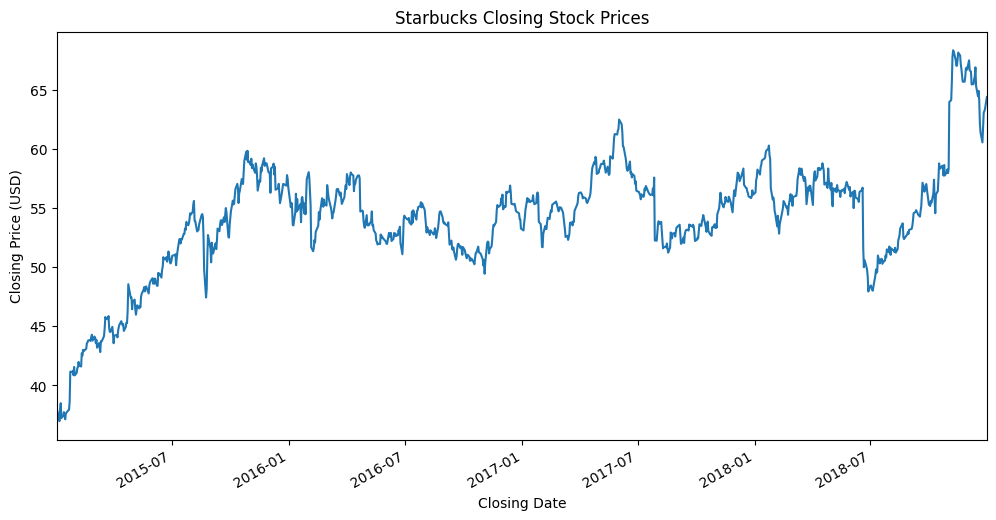

In [10]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## X axis limit

특정 시간 범위를 x축 제한으로 설정할 수 있는 두 가지 방법이 있습니다.<br>
데이터 세트의 조각을 플로팅하거나 x-limit 값을 df.plot()에 인수로 전달할 수 있습니다.

슬라이스 사용의 장점은 팬더가 그에 따라 y 제한을 자동으로 조정한다는 것입니다.

인수 전달의 장점은 팬더가 자동으로 x축을 조절한다는 것입니다.<br>
또한 y-한계도 설정하면 가독성이 향상될 수 있습니다.


### Choosing X Limits by Slice:

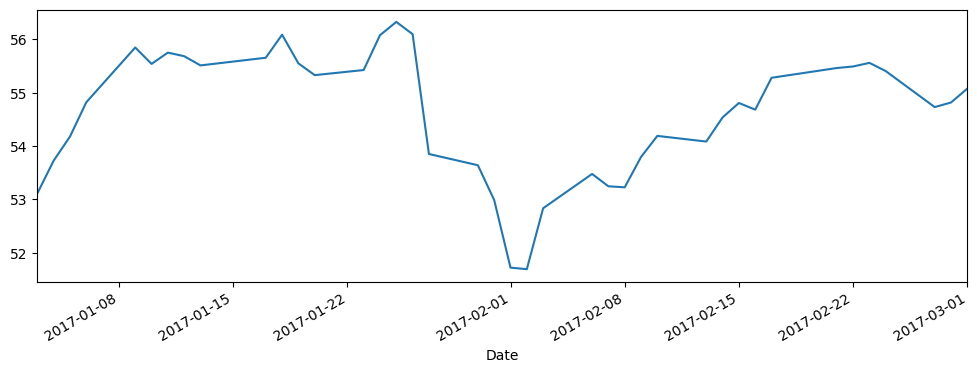

In [13]:
# Dates are separated by a colon:
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4)).autoscale(axis='x',tight=True);

### Choosing X Limits by Argument:

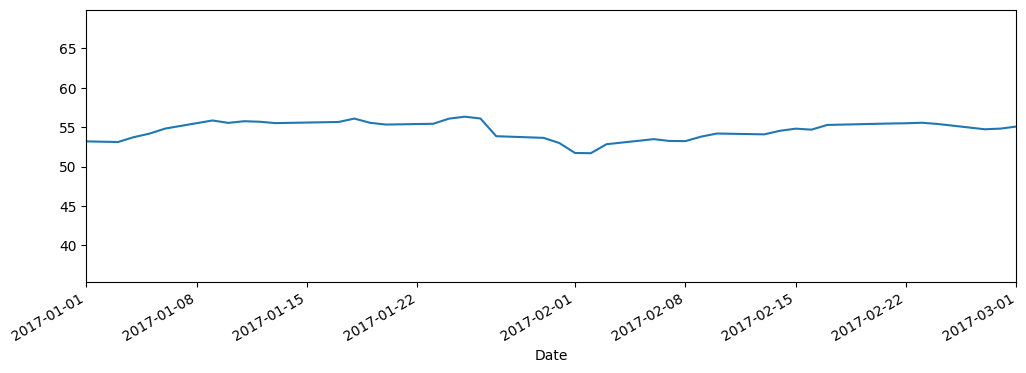

In [14]:
# Dates are separated by a comma:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

<div class="alert alert-info"><strong>NOTE:</strong> '한계 값이 인덱스에 나타날 필요가 없다는 점' 을 확인하세요. Pandas는 시간상의 위치를 기반으로 실제 날짜를 표시합니다.<br>또한 index에 대한 슬라이싱은 y-axis를 조절하기 쉬운 방법입니다.<br><br><tt><font color=black>df['column']['2017-01-01':].plot()</font></tt> ← Easy!<br><tt><font color=black>df['column'].plot(xlim=('2017-01-01',df.index.max()))</font></tt></div>

이제 데이터의 모양을 더 잘 이해하기 위해 y축 limit을 보겠습니다.<br>먼저 사용할 상한과 하한을 알아보겠습니다.

In [15]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

In [16]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].max()

56.3244

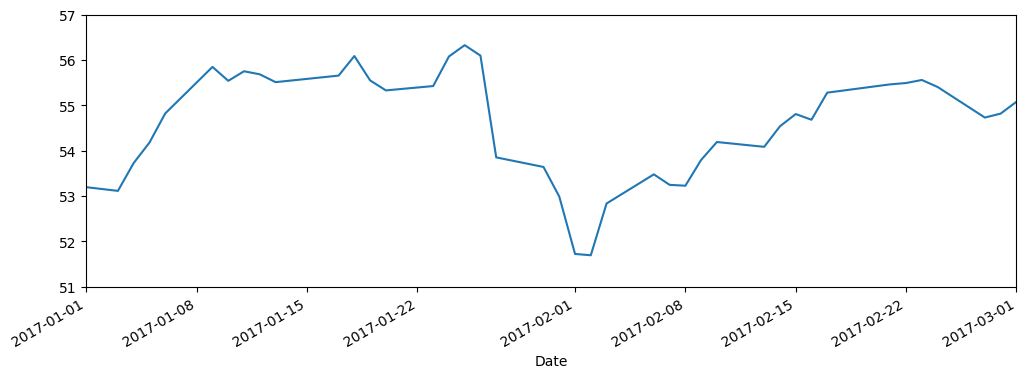

In [17]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57]);

<div class="alert alert-info"><strong>NOTE:</strong> y축 제한을 설정할 때, 슬라이스를 너무 좁게 설정하면 그래프가 지나치게 fluctuation이 커 보일 수 있습니다. 위의 차트는 2017년 1월 주식이 2월 초보다 몇 배나 더 가치가 있는 것 처럼 보이지만, y축 최소값을 0으로 설정한 상태에서 주식을 보면 다른 이야기를 알 수 있습니다.</div>

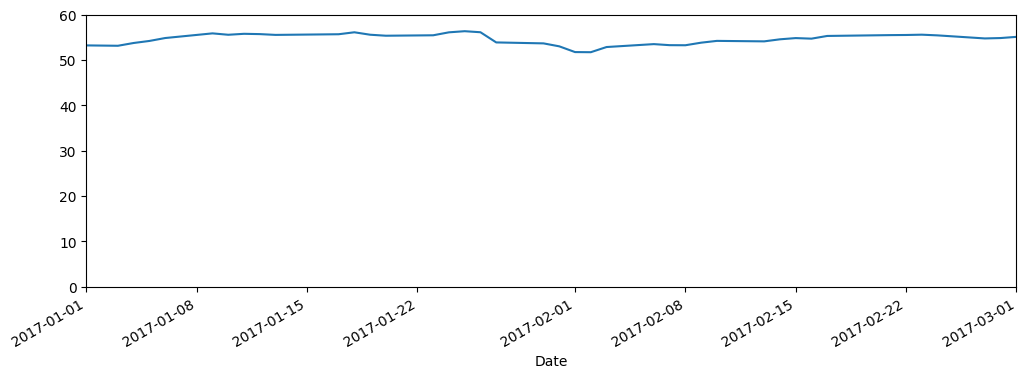

In [18]:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[0,60]);

## Title and axis labels
Let's add a title and axis labels to our subplot.
<div class="alert alert-info"><strong>REMEMBER:</strong> 만약 axis limit이 제공된다면 <tt><font color=black>ax.autoscale(axis='both',tight=True)</font></tt>  <tt>.plot()</tt>은 필요없습니다.<br>
만약 넣는다면, Autoscale이 x-axis의 Ticks를 변경합니다.</div>

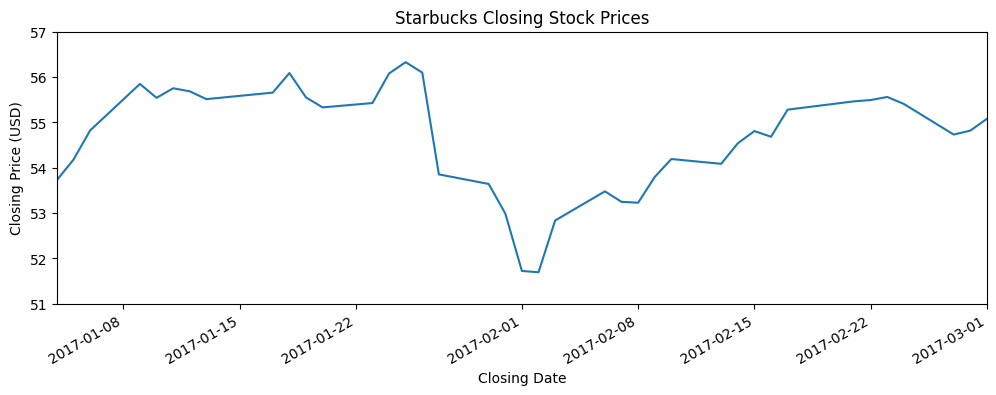

In [19]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(xlim=['2017-01-04','2017-03-01'],ylim=[51,57],figsize=(12,4),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Color and Style
line의 스타일과 색상을 변경하기 위해 .plot() 함수에 인수를 전달할 수 있습니다.

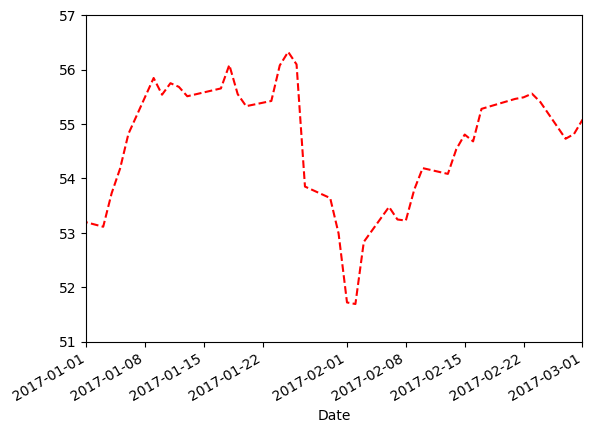

In [20]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');

## X Ticks

x축을 따라 날짜의 형식과 모양을 변경하는 방법을 살펴보겠습니다.<br>
이를 위해 matplotlib에서 'dates'를 활용합니다.

In [21]:
from matplotlib import dates

### Set the spacing

x축 값은 Major axes과 Minor axes로 나눌 수 있습니다.<br>
지금은 Major axis로만 작업하고 <tt>.set_major_locator()</tt>로 x-axis의 간격을 설정해봅니다.

set_major_locator(dates.WeekdayLocator(byweekday=0)) 를 통해, X-axis의 tick을 일주일 간격으로 표시합니다.<br>
byweeday=0은 월요일만 표시합니다.

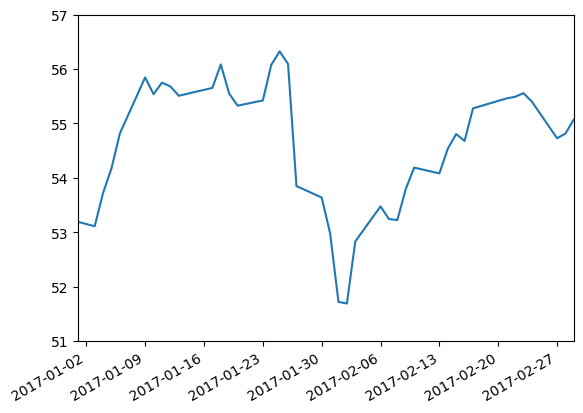

In [22]:
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57])

# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

### Date Formatting
Python datetime의 포맷 변경: <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
Format은 datetime 변수를 기반합니다.<br>
ex: <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [23]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
from datetime import datetime
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

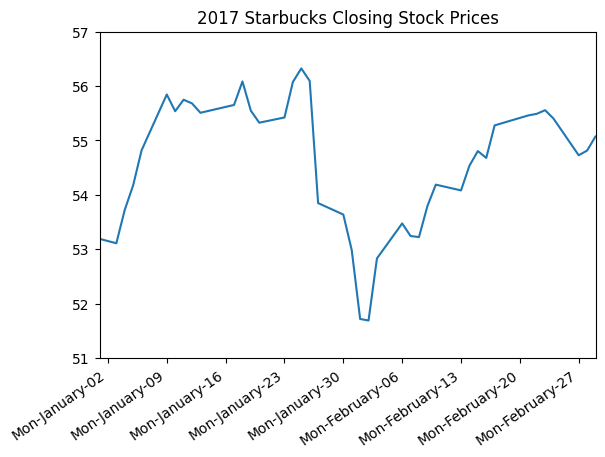

In [24]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57], rot=35, title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

<font color=green><strong>NOTE: </strong>plot 함수의 인자로 <font color=black><strong>rot=0</strong></font> 를 <tt><font color=black>df.plot()</font></tt> 에 넘겨주어 비스듬하게 표시할 수 있습니다.

## Major vs. Minor Axis Values
지금까지 사용한 모든 X-axis의 Tick은 Major axis 입니다.<br>
<em>Minor axis</em>를 통해, 다른 수준의 tick을 할당할 수 있습니다.

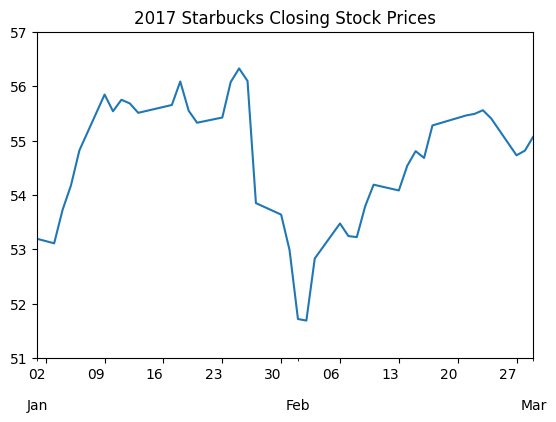

In [25]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

## Adding Gridlines
각 주요 눈금 표시에서 플롯으로 확장되는 x 및 y 축 눈금선을 추가할 수 있습니다.

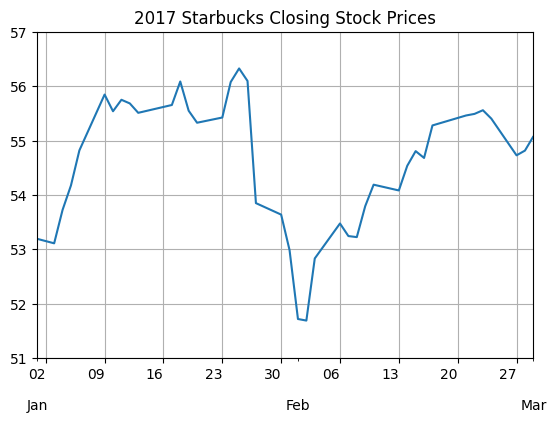

In [26]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)